<a href="https://colab.research.google.com/github/get2aakash/DSMLprojects/blob/main/IPL_Season_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import zipfile

In [20]:
df = pd.read_csv('/content/matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [21]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/deliveries.csv')
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [35]:
season = df[['id','season']].merge(df2,left_on='id',right_on='match_id',how='left').drop('id',axis=1)

In [32]:
season.head()

,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


#Runs across the season

In [49]:
RunsAcrossSeason = season.groupby(['season'])['total_runs'].count().reset_index()

In [50]:
RunsAcrossSeason

,season,total_runs
0,2008,13489
1,2009,13606
2,2010,14498
3,2011,17013
4,2012,17767
5,2013,18177
6,2014,14300
7,2015,13652
8,2016,14096
9,2017,13862


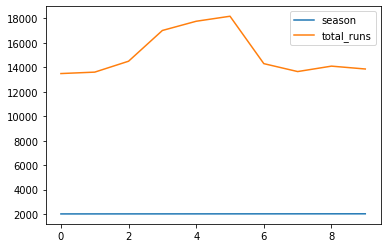

In [51]:
RunsAcrossSeason.plot()

#Average runs per match in each season

In [52]:
season.tail()

,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
150455,2016,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,2016,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,2016,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,2016,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
150459,2016,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,6,Iqbal Abdulla,Sachin Baby,B Kumar,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


In [64]:
season = season.groupby(['season'])['total_runs'].sum().reset_index()
season

,season,total_runs
0,2008,17937
1,2009,16353
2,2010,18883
3,2011,21154
4,2012,22453
5,2013,22602
6,2014,18931
7,2015,18353
8,2016,18862
9,2017,18786


In [63]:
avg_runs = df.groupby('season')['id'].count().reset_index()
avg_runs

,season,id
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


In [69]:
AvgRunsPerMatch = pd.concat([avg_runs,season.iloc[:,1]],axis=1)

In [70]:
AvgRunsPerMatch

,season,id,total_runs
0,2008,58,17937
1,2009,57,16353
2,2010,60,18883
3,2011,73,21154
4,2012,74,22453
5,2013,76,22602
6,2014,60,18931
7,2015,59,18353
8,2016,60,18862
9,2017,59,18786


In [72]:
AvgRunsPerMatch['Average'] = AvgRunsPerMatch['total_runs']/AvgRunsPerMatch['id']
AvgRunsPerMatch

,season,id,total_runs,Average
0,2008,58,17937,309.258621
1,2009,57,16353,286.894737
2,2010,60,18883,314.716667
3,2011,73,21154,289.780822
4,2012,74,22453,303.418919
5,2013,76,22602,297.394737
6,2014,60,18931,315.516667
7,2015,59,18353,311.067797
8,2016,60,18862,314.366667
9,2017,59,18786,318.406780


#Most lucky groud for teams

In [74]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [86]:
def lucky(df,team_name):
  return df[df['winner']==team_name]['venue'].value_counts().nlargest(5)

In [87]:
lucky(df,'Mumbai Indians')

Wankhede Stadium              34
Eden Gardens                   9
M Chinnaswamy Stadium          8
Brabourne Stadium              6
Dr DY Patil Sports Academy     5
Name: venue, dtype: int64

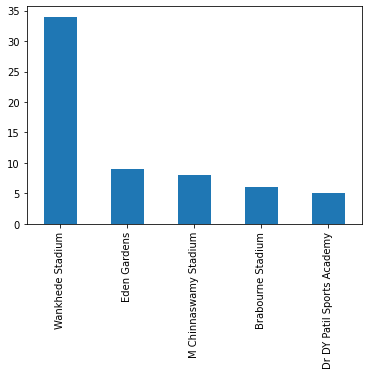

In [88]:
lucky(df,'Mumbai Indians').plot(kind='bar')

In [91]:
teamlist = df['team1'].unique()
teamlist

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [99]:
for i in teamlist:
  y =  lucky(df,i)
  print("********************")
  print(i)
  print(y)

********************
Sunrisers Hyderabad
Rajiv Gandhi International Stadium, Uppal              20
Feroz Shah Kotla                                        4
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     3
M Chinnaswamy Stadium                                   2
Punjab Cricket Association Stadium, Mohali              2
Name: venue, dtype: int64
********************
Mumbai Indians
Wankhede Stadium              34
Eden Gardens                   9
M Chinnaswamy Stadium          8
Brabourne Stadium              6
Dr DY Patil Sports Academy     5
Name: venue, dtype: int64
********************
Gujarat Lions
Saurashtra Cricket Association Stadium                  3
Punjab Cricket Association IS Bindra Stadium, Mohali    2
Eden Gardens                                            2
Green Park                                              2
M Chinnaswamy Stadium                                   1
Name: venue, dtype: int64
********************
Rising Pune Supergiant
Maharashtra Cricket A